In [1]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale, give_error
from utils import generate_and_avaliate_model

from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise.pkl')

In [3]:
df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,gvtec3,gvtec3_dt,s4
2013-12-01 02:10:00,38.901869,-1.406371,0.090805,-3.012794,-0.302865,-0.138129,-2.709478,-0.748023,-0.046265,0.116034
2013-12-01 02:20:00,37.676039,-1.201542,0.204829,-3.176458,-0.149123,-1.840996,-1.712064,-0.797389,-0.046810,0.112015
2013-12-01 02:30:00,36.751092,-0.957067,0.244475,-3.090844,0.030793,-2.211419,-0.669840,-0.815543,-0.040540,0.111552
2013-12-01 02:40:00,36.059834,-0.762969,0.194098,-2.880283,0.127728,-1.957485,-0.038873,-0.858718,-0.060494,0.108269
2013-12-01 02:50:00,35.416633,-0.653073,0.109896,-2.733366,0.097938,-1.737745,0.141762,-0.969081,-0.102394,0.106616


# Floresta para Regressão
## Completa

In [4]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
acc              0.934670
f1               0.529777
far              0.466141
fn              42.000000
fp              41.100000
kappa            0.030850
me               0.350417
mse              0.002183
pod              0.528090
precission       0.533859
re              15.844116
recall           0.528090
tn            1141.900000
tp              47.000000
tse              1.666145
dtype: float64


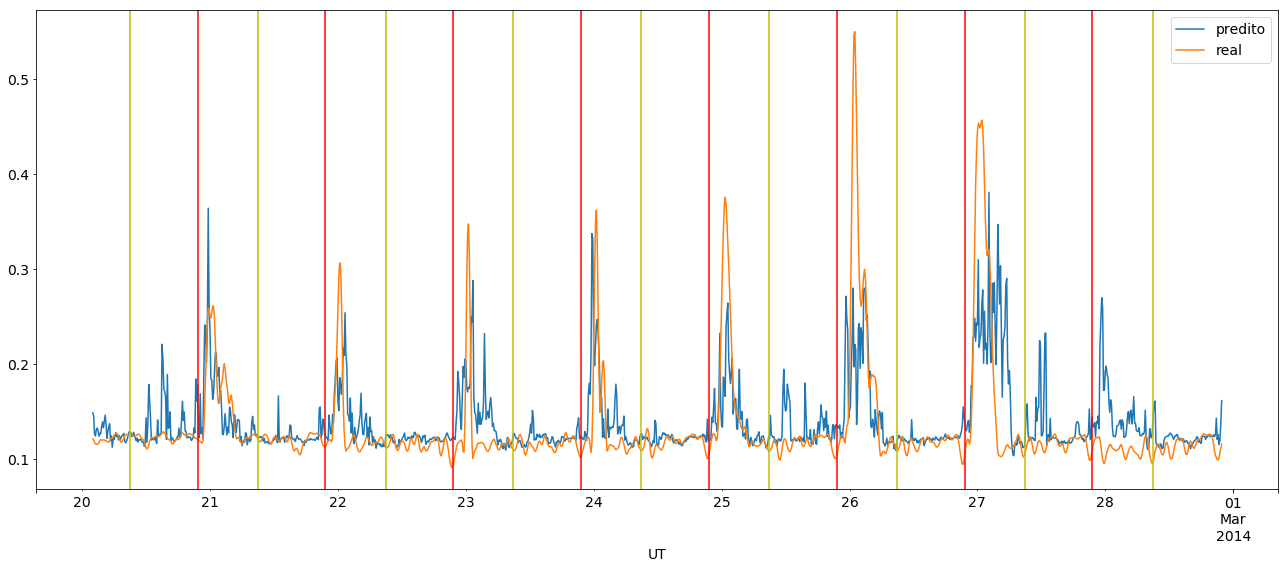

In [5]:
dict_error = generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4',
                            file_to_save_model='./images/regression_random_florest.eps')

## Sem vtec

In [6]:
instances_set = ['vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
acc              0.920676
f1               0.521053
far              0.548474
fn              33.900000
fp              67.000000
kappa            0.025688
me               0.352038
mse              0.002462
pod              0.619101
precission       0.451526
re              19.351117
recall           0.619101
tn            1116.000000
tp              55.100000
tse              1.769391
dtype: float64


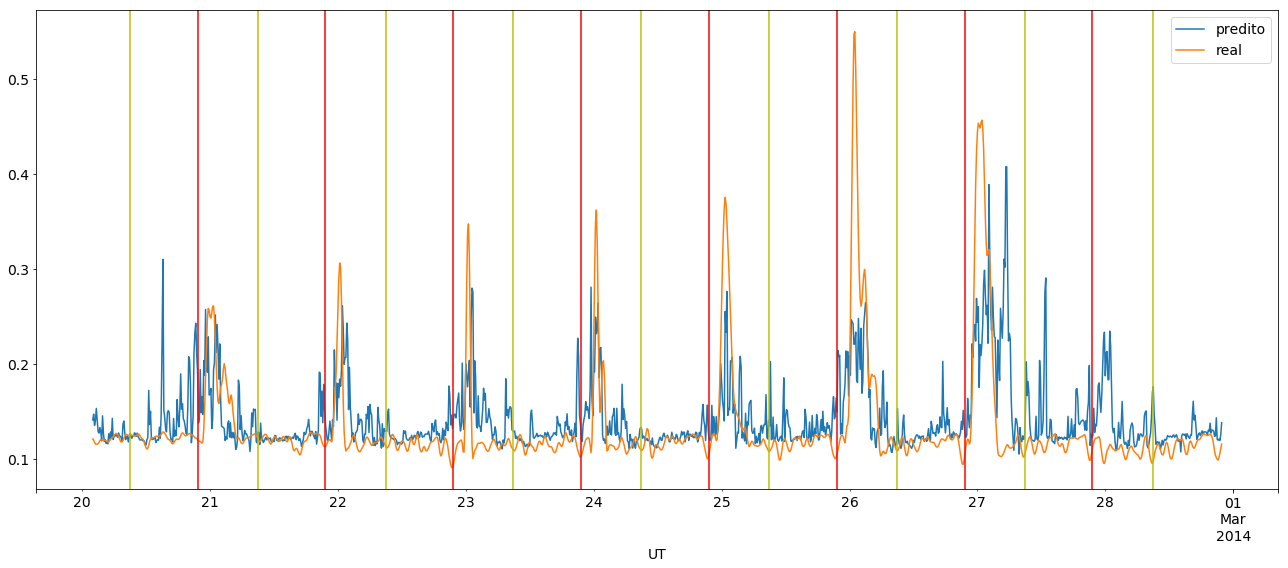

{'acc': 0.9206761006289309,
 'f1': 0.5210531554941336,
 'far': 0.5484744294894093,
 'fn': 33.9,
 'fp': 67.0,
 'kappa': 0.02568844932953602,
 'me': 0.3520382534914497,
 'mse': 0.0024618669098596746,
 'pod': 0.6191011235955057,
 'precission': 0.4515255705105908,
 're': 19.35111725069608,
 'recall': 0.6191011235955057,
 'tn': 1116.0,
 'tp': 55.1,
 'tse': 1.7693906709654699}

In [7]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')

## Sem derivada temporal primeira do VTEC

In [8]:
instances_set = ['vtec', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
acc              0.929481
f1               0.502188
far              0.499614
fn              43.500000
fp              46.200000
kappa            0.031918
me               0.367301
mse              0.002258
pod              0.511236
precission       0.500386
re              16.178698
recall           0.511236
tn            1136.800000
tp              45.500000
tse              1.694329
dtype: float64


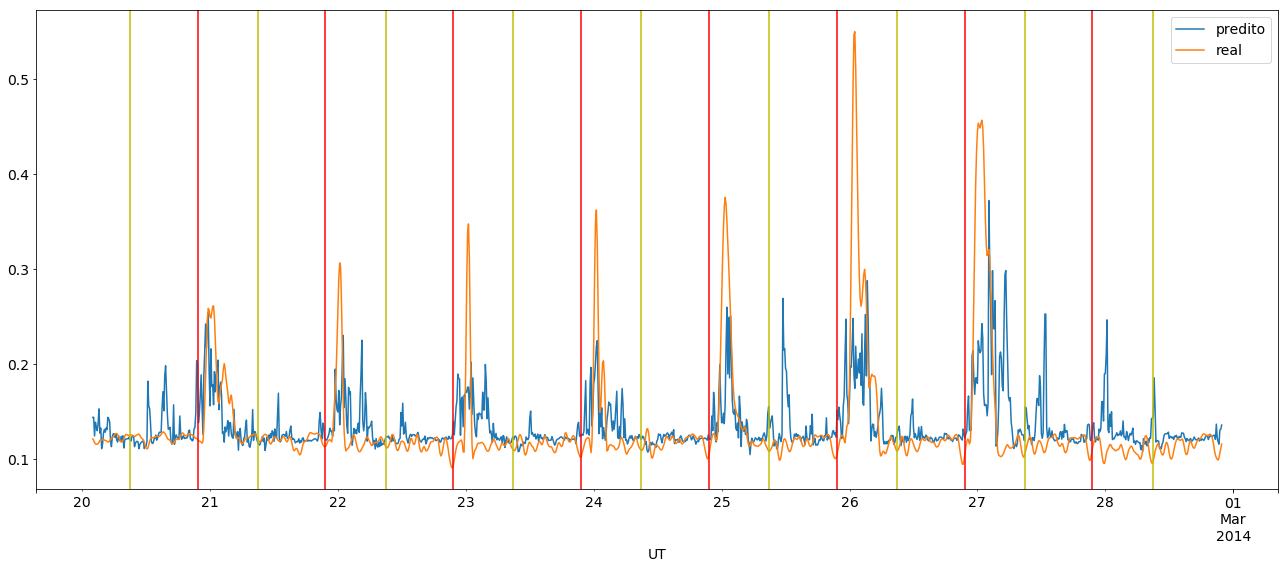

{'acc': 0.9294811320754717,
 'f1': 0.5021881996273441,
 'far': 0.49961405697919414,
 'fn': 43.5,
 'fp': 46.2,
 'kappa': 0.03191755913531901,
 'me': 0.36730121872606813,
 'mse': 0.002257823793639973,
 'pod': 0.5112359550561798,
 'precission': 0.5003859430208057,
 're': 16.178697822951836,
 'recall': 0.5112359550561798,
 'tn': 1136.8,
 'tp': 45.5,
 'tse': 1.6943291611969253}

In [9]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')

## Sem derivada temporal segunda do VTEC

In [10]:
instances_set = ['vtec', 'vtec_dt', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
acc              0.932783
f1               0.493226
far              0.475704
fn              47.200000
fp              38.300000
kappa            0.034413
me               0.311176
mse              0.002326
pod              0.469663
precission       0.524296
re              16.124653
recall           0.469663
tn            1144.700000
tp              41.800000
tse              1.719458
dtype: float64


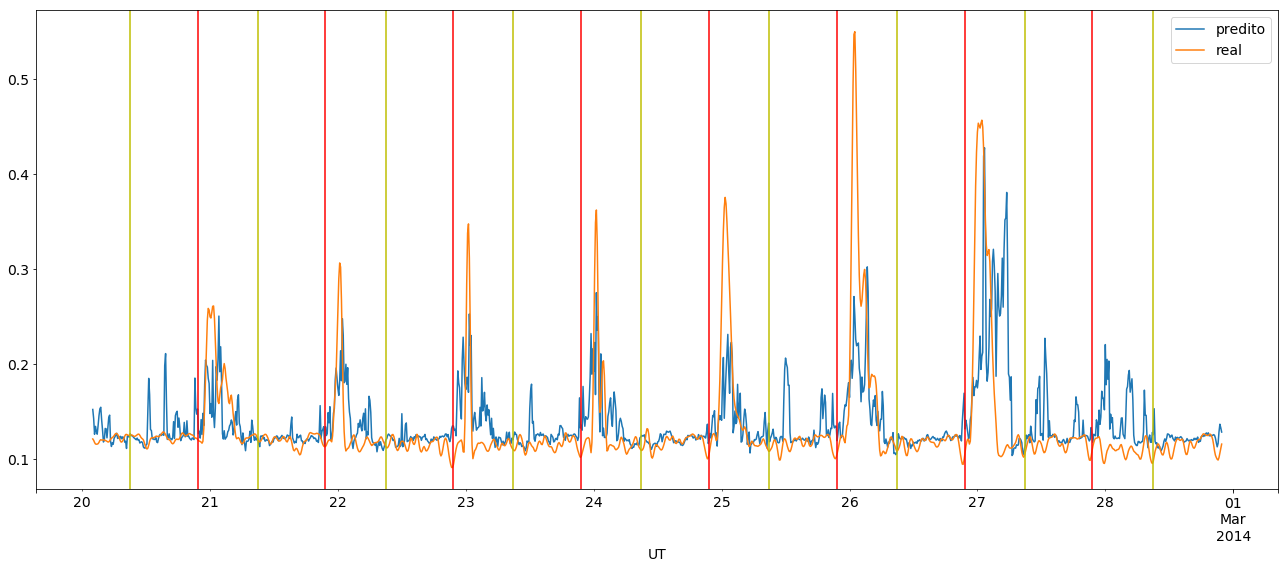

{'acc': 0.9327830188679245,
 'f1': 0.49322610065106964,
 'far': 0.47570359467694023,
 'fn': 47.2,
 'fp': 38.3,
 'kappa': 0.03441338109647561,
 'me': 0.3111764404534272,
 'mse': 0.0023258370886493226,
 'pod': 0.46966292134831455,
 'precission': 0.5242964053230598,
 're': 16.12465262194985,
 'recall': 0.46966292134831455,
 'tn': 1144.7,
 'tp': 41.8,
 'tse': 1.7194579350539487}

In [11]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')

## Sem gradiente do VTEC em relação à Pirassununga

In [12]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
acc              0.926258
f1               0.488121
far              0.522437
fn              44.200000
fp              49.600000
kappa            0.032365
me               0.366598
mse              0.002451
pod              0.503371
precission       0.477563
re              17.280547
recall           0.503371
tn            1133.400000
tp              44.800000
tse              1.765611
dtype: float64


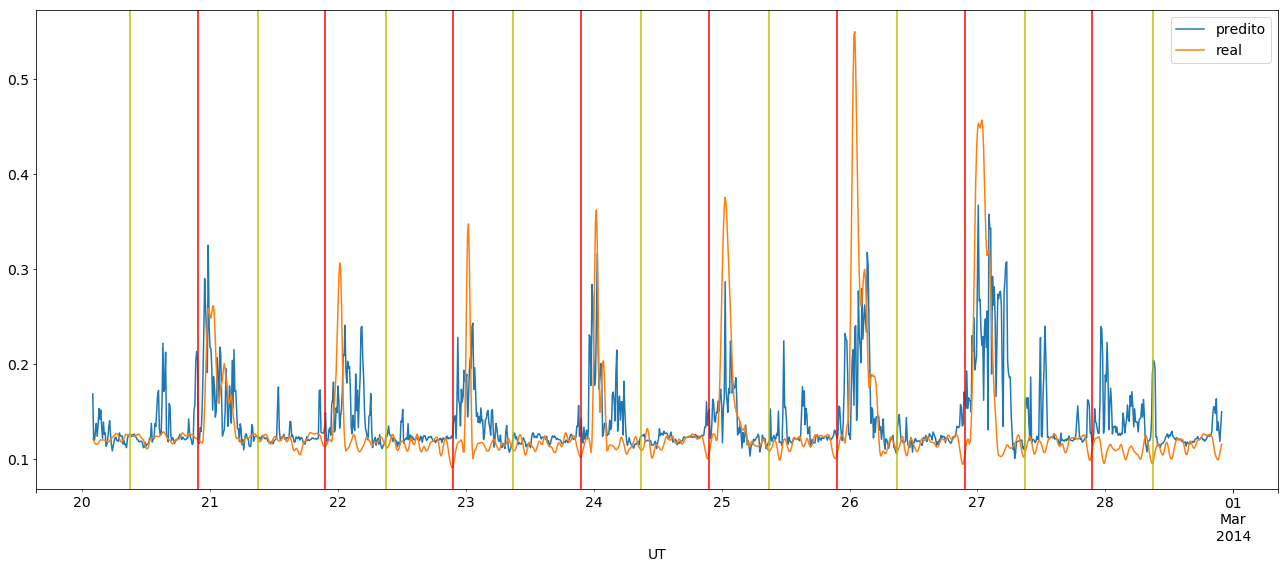

{'acc': 0.9262578616352201,
 'f1': 0.48812058889706417,
 'far': 0.5224373954835443,
 'fn': 44.2,
 'fp': 49.6,
 'kappa': 0.03236521498358451,
 'me': 0.36659796009224477,
 'mse': 0.002451274816559287,
 'pod': 0.503370786516854,
 'precission': 0.4775626045164557,
 're': 17.280546514798043,
 'recall': 0.503370786516854,
 'tn': 1133.4,
 'tp': 44.8,
 'tse': 1.7656109073688881}

In [13]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')

## Sem derivada temporal do gradiente do VTEC em relação à Pirassununga

In [14]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec2', 'gvtec2_dt']

Error for the time series sample:
acc              0.932862
f1               0.472896
far              0.473887
fn              50.500000
fp              34.900000
kappa            0.036663
me               0.370644
mse              0.002285
pod              0.432584
precission       0.526113
re              16.034509
recall           0.432584
tn            1148.100000
tp              38.500000
tse              1.703562
dtype: float64


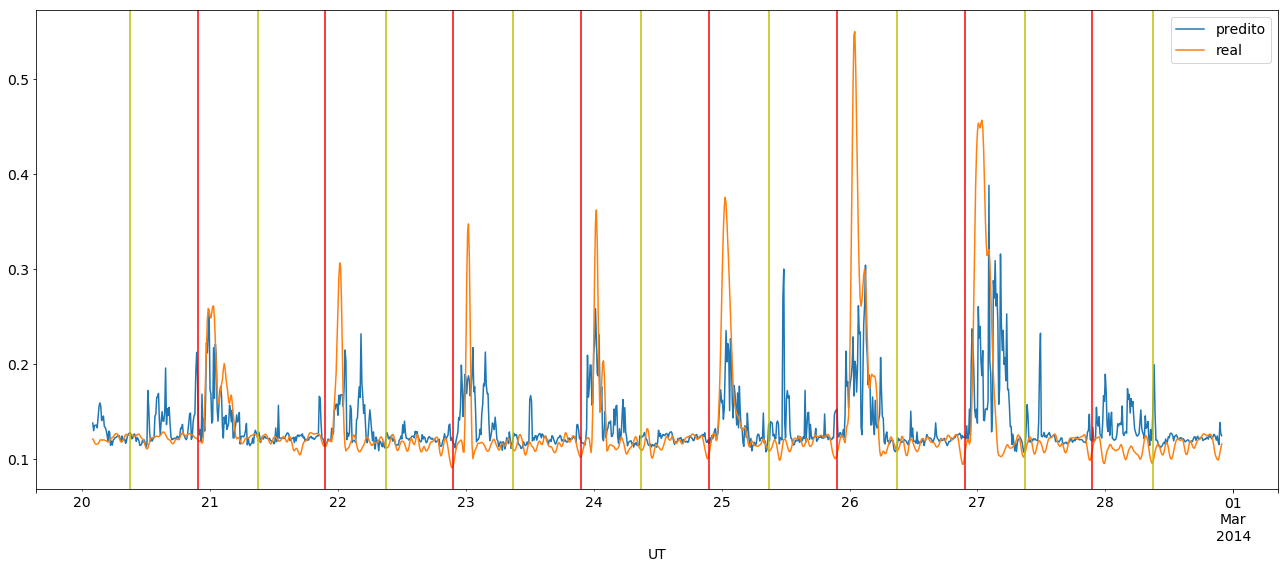

{'acc': 0.9328616352201257,
 'f1': 0.47289625207415337,
 'far': 0.47388742620364877,
 'fn': 50.5,
 'fp': 34.9,
 'kappa': 0.03666278529330327,
 'me': 0.37064392535093105,
 'mse': 0.0022845722429540756,
 'pod': 0.4325842696629213,
 'precission': 0.5261125737963511,
 're': 16.034509173115588,
 'recall': 0.4325842696629213,
 'tn': 1148.1,
 'tp': 38.5,
 'tse': 1.703561589998372}

In [15]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')

## Sem gradiente do VTEC em relação à Brasília

In [16]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2_dt']

Error for the time series sample:
acc              0.919497
f1               0.458088
far              0.567251
fn              45.500000
fp              56.900000
kappa            0.033206
me               0.332505
mse              0.002496
pod              0.488764
precission       0.432749
re              18.336357
recall           0.488764
tn            1126.100000
tp              43.500000
tse              1.781214
dtype: float64


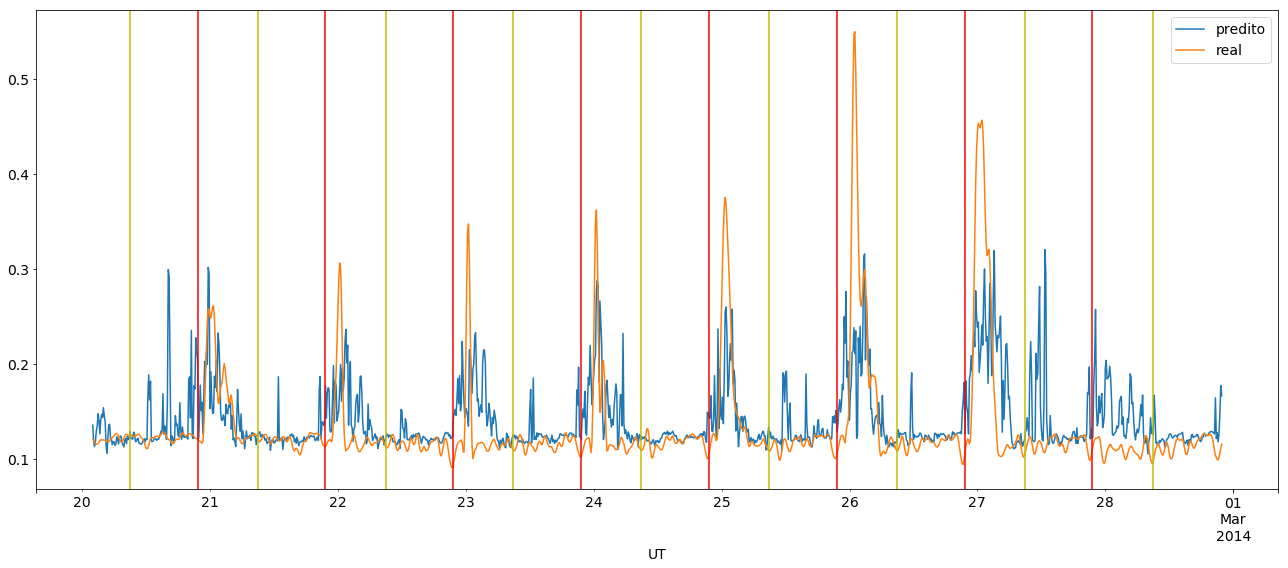

{'acc': 0.919496855345912,
 'f1': 0.458087591328509,
 'far': 0.5672514810819247,
 'fn': 45.5,
 'fp': 56.9,
 'kappa': 0.03320638523001463,
 'me': 0.3325045749284001,
 'mse': 0.0024960744018990054,
 'pod': 0.48876404494382025,
 'precission': 0.4327485189180752,
 're': 18.3363572008248,
 'recall': 0.48876404494382025,
 'tn': 1126.1,
 'tp': 43.5,
 'tse': 1.781213542515853}

In [17]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')

## Sem derivada temporal do gradiente do VTEC em relação à Brasília

In [18]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2']

Error for the time series sample:
acc              0.935377
f1               0.519574
far              0.458460
fn              44.300000
fp              37.900000
kappa            0.032418
me               0.380131
mse              0.002172
pod              0.502247
precission       0.541540
re              15.489566
recall           0.502247
tn            1145.100000
tp              44.700000
tse              1.661766
dtype: float64


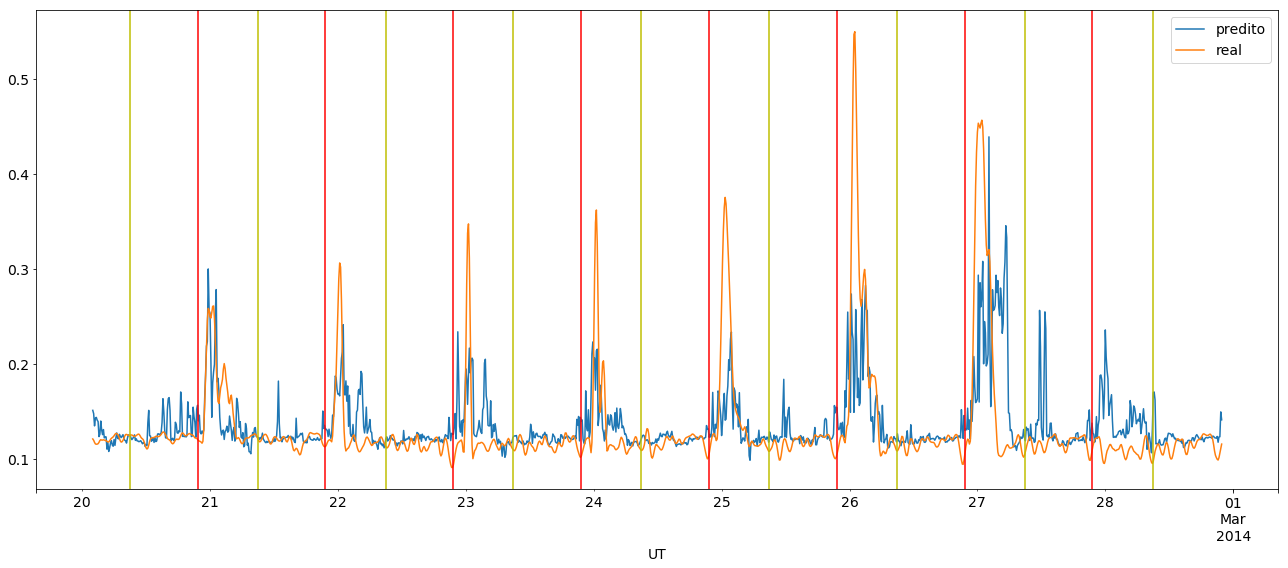

{'acc': 0.935377358490566,
 'f1': 0.5195739555965204,
 'far': 0.45846011952653487,
 'fn': 44.3,
 'fp': 37.9,
 'kappa': 0.0324184911593687,
 'me': 0.3801308109010245,
 'mse': 0.0021717584443110634,
 'pod': 0.5022471910112359,
 'precission': 0.541539880473465,
 're': 15.489565945049932,
 'recall': 0.5022471910112359,
 'tn': 1145.1,
 'tp': 44.7,
 'tse': 1.6617660571630402}

In [19]:
generate_and_avaliate_model(df=df,
                            instances_set=instances_set,
                            target='s4')